#**Project 2**
##**Pet Classification Model Using CNN.**

###OBJECTIVE-
You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data.

In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_img_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [13]:
train=train_img_gen.flow_from_directory("/content/drive/MyDrive/train",
                                  target_size=(256,256),batch_size=32,class_mode="binary")

Found 40 images belonging to 2 classes.


In [14]:
train.filenames[0]

'cats/1.jpg'

In [17]:
train.filenames[23]

'dogs/12.jpg'

In [19]:
train.image_shape

(256, 256, 3)

In [20]:
train.num_classes

2

In [21]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
train.class_indices

{'cats': 0, 'dogs': 1}

loading the images and visualizing it

In [23]:
from tensorflow.keras.preprocessing.image import load_img

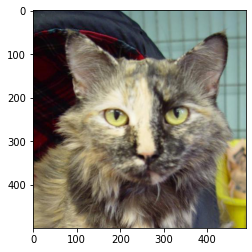

In [26]:
#for cat
img=load_img('/content/drive/MyDrive/train/cats/10.jpg')
import matplotlib.pyplot as plt
plt.imshow(img)

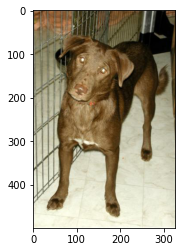

In [27]:
#for dog
img1=load_img('/content/drive/MyDrive/train/dogs/1.jpg')
plt.imshow(img1)

In [28]:
test_img_gen=ImageDataGenerator(rescale=1./255)
test=test_img_gen.flow_from_directory("/content/drive/MyDrive/test",
                                  target_size=(256,256),batch_size=32,class_mode="binary")

Found 20 images belonging to 2 classes.


In [29]:
test.class_indices

{'cats': 0, 'dogs': 1}

In [30]:
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

##**initializing the CNN**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [33]:
#adding model as sequential
model=Sequential()

In [34]:
# Adding the  Convolution layers
#Convolutional layer 1 :with 32 filters of kernel size[5,5] and stride=2

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=[256,256,3]))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [37]:
# adding 2nd convolution layer with 64 filters and kernal_size=(5,5)
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [38]:
# adding flattern layer
model.add(Flatten())

In [39]:
#Dense layer whose output size is fixed. fc_size=32

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.4,seed=25))

In [40]:
#for output layer
model.add(Dense(1,activation="softmax"))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 32)               

In [45]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 6.3 MB/s 


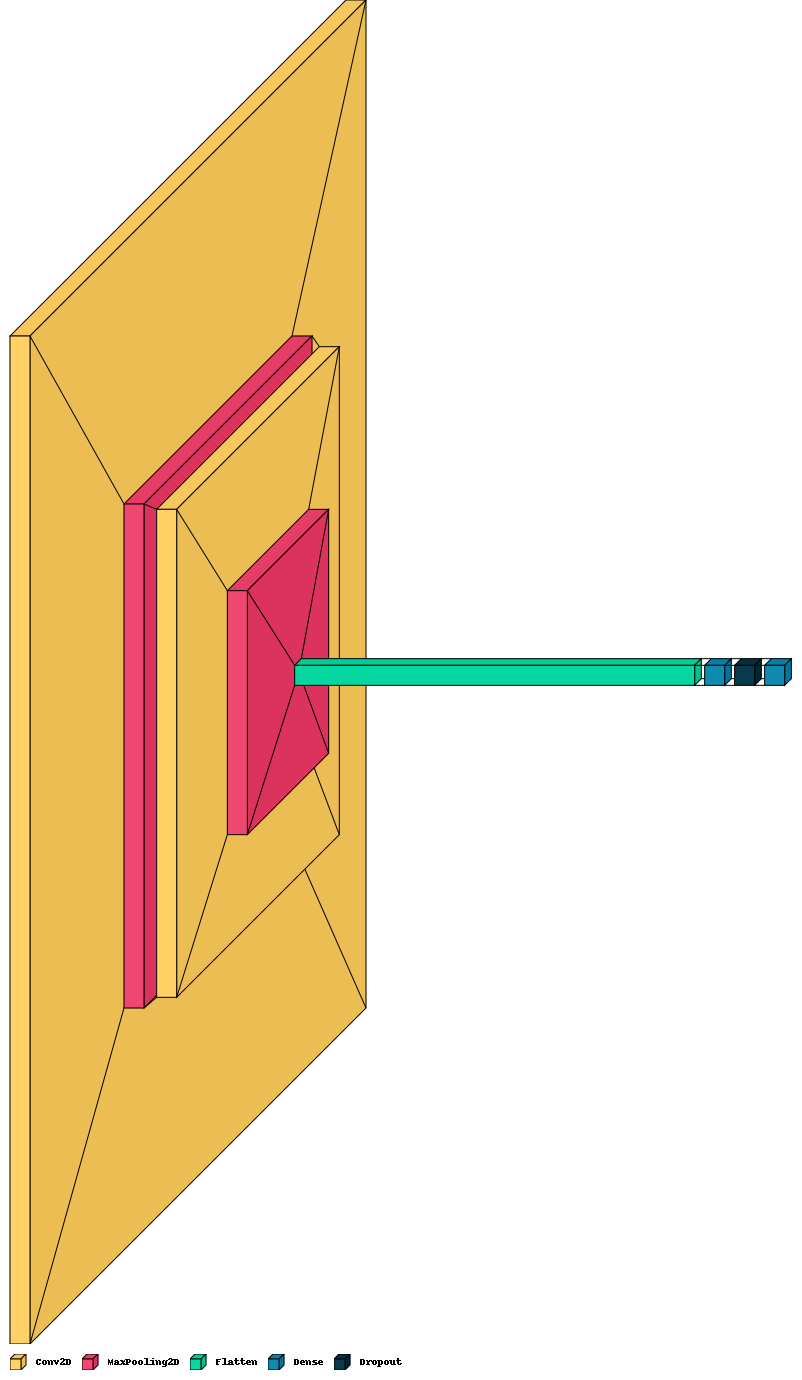

<Figure size 144x360 with 0 Axes>

In [48]:
import visualkeras
plt.figure(figsize=(2,5))
visualkeras.layered_view(model,legend=True,)

In [49]:
#compiling the model taking loss as binary cross entropy as two classes to classify 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
# fitting the model with train and validating with test datasets for 100 epochs
model.fit(train,validation_data=test,epochs=100)

Epoch 1/100
2/2 [==============================] - 20s 14s/step - loss: 6.0464 - accuracy: 0.5000 - val_loss: 1.4325 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 8s 2s/step - loss: 2.0495 - accuracy: 0.5000 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 8s 2s/step - loss: 1.0250 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 8s 6s/step - loss: 0.6912 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 8s 6s/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 8s 2s/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 8s 2s/step - loss: 0.6865 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 8/100
2/2 [===============